## Module 1 Project: Clean, explore, and model this dataset with a multivariate linear regression to predict the sale price of houses as accurately as possible.

### <font color=blue>OSEMN FRAMEWORK:</font>
* __Obtain__ - from another location extract and generate data.<br>
-- The import of the main file for this project was relatively straightforward as it was included in the notebook for the assignment.  Immediately after that most relevant packages were also imported (pandas, numpy, matplotlib, statsmodels, seaborn).
* __Scrub__ - filtering lines, extracting columns, replacing values, handling missing values, converting formats.<br>
-- This stage is where the bulk of the time spent on the project took place.  There were numerous null values in multiple columns that had to be dealt with.  Additionally, there were other rogue characters and formats that needed to be changed in order for the data to be workable.
* __Explore__ - understand data, deriving statistics, creating visualization.<br>
-- Exploring  and creating visualizations for this dataset was not that complex as the data for housing prices is fairly self explanatory.  Visuals created were either histograms or scatter plots.
* __Model__ - clustering, classification, regression, dimensionality reduction.<br>
-- This section took a lot of time to complete and needed more than a few iterations in order to go through the modeling process.  Finding models that worked and did not have too high of an R^2 value drove this part of the process.
* __Interpret__ - drwaing conclusions from data, evaluate meaning of results, communicating result.<br>
-- The final section of interpretation probably took the shortest amount of time as the work of creating the model and its preparation allowed for most of the work to be done already.  The conclusions were relatively clear after that.

## <font color=red> EDA </font>

## Import necessary packages

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
from statsmodels.formula.api import ols
import seaborn as sns
%matplotlib inline

## Import file with data

In [6]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Dropping id column

* The 'id' column is only an identifier and is acting like an index.  Since an index already exists this column can be dropped.

In [7]:
df.drop(['id'], axis=1, inplace=True)

In [8]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Creating a new "yr_renovated_update" column.

* This is due to the fact that only 5% of houses have been renovated so it should have little impact on overall house prices.  The original "yr_renovated" column will remain for now and be removed before log transformation.

* Null values exist in the "yr_renovated" column.

In [9]:
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

* 95% of the houses in this data set have not been renovated per the below - they are those with a value of "0".

In [10]:
df.yr_renovated.value_counts(normalize=True).head()

0.0       0.958096
2014.0    0.004112
2003.0    0.001746
2013.0    0.001746
2007.0    0.001690
Name: yr_renovated, dtype: float64

* Using a "where" statement to convert all values that do not have a year associated with them to "0".  All other values (those houses that have been renovated) are converted to a value of "1".

In [11]:
df['yr_renovated_update'] = np.where(df['yr_renovated'] == 0, 0, 1)

* Confirming the conversion has been done.

In [12]:
df['yr_renovated_update'].unique()

array([0, 1], dtype=int64)

In [13]:
df.yr_renovated_update.head()

0    0
1    1
2    1
3    0
4    0
Name: yr_renovated_update, dtype: int32

In [14]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated_update
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,1
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0


In [15]:
df.yr_renovated_update.value_counts()

0    17011
1     4586
Name: yr_renovated_update, dtype: int64

## General review of Shape, Info and Describe.

In [16]:
df.shape

(21597, 21)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
date                   21597 non-null object
price                  21597 non-null float64
bedrooms               21597 non-null int64
bathrooms              21597 non-null float64
sqft_living            21597 non-null int64
sqft_lot               21597 non-null int64
floors                 21597 non-null float64
waterfront             19221 non-null float64
view                   21534 non-null float64
condition              21597 non-null int64
grade                  21597 non-null int64
sqft_above             21597 non-null int64
sqft_basement          21597 non-null object
yr_built               21597 non-null int64
yr_renovated           17755 non-null float64
zipcode                21597 non-null int64
lat                    21597 non-null float64
long                   21597 non-null float64
sqft_living15          21597 non-null int64
sqft_lot15             21597 non-null

In [18]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated_update
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,0.212344
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950,0.408977
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000


## DROPPING BEDROOMS:

* Dropping single house with 33 bedrooms

In [19]:
df[df['bedrooms']==33]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated_update
15856,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,...,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700,0


In [20]:
df.drop(df.index[15856], inplace=True)

* Dropping all houses with more than 7 bedrooms

In [21]:
df[df['bedrooms']>=7]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated_update
556,6/20/2014,1950000.0,7,3.50,4640,15235,2.0,NaN,1.0,3,...,2860,1780.0,1965,2003.0,98040,47.5666,-122.231,3230,20697,1
1134,1/5/2015,420000.0,7,3.00,2940,8624,1.0,0.0,0.0,3,...,1690,1250.0,1977,NaN,98155,47.7555,-122.307,1850,8031,1
1239,6/23/2014,350000.0,7,3.00,2800,9569,1.0,0.0,2.0,3,...,1400,1400.0,1963,0.0,98056,47.5102,-122.183,2150,7333,0
1658,12/4/2014,490000.0,8,5.00,2800,2580,2.0,0.0,0.0,3,...,1880,920.0,1997,0.0,98122,47.6086,-122.303,1800,2580,0
3717,1/15/2015,884900.0,7,4.75,5370,10800,1.5,0.0,0.0,3,...,5370,0.0,1967,0.0,98040,47.5380,-122.223,2310,10910,0
4020,10/7/2014,800000.0,7,6.75,7480,41664,2.0,0.0,2.0,3,...,5080,2400.0,1953,NaN,98166,47.4643,-122.368,2810,33190,1
4031,10/7/2014,2150000.0,8,6.00,4340,9415,2.0,0.0,0.0,3,...,4340,0.0,1967,0.0,98004,47.6316,-122.202,2050,9100,0
4063,2/19/2015,373000.0,8,3.00,2850,12714,1.0,NaN,0.0,3,...,2850,0.0,1959,0.0,98055,47.4859,-122.205,1480,4942,0
4092,5/7/2014,599999.0,9,4.50,3830,6988,2.5,0.0,0.0,3,...,2450,1380.0,1938,0.0,98103,47.6927,-122.338,1460,6291,0
4231,1/6/2015,700000.0,9,3.00,3680,4400,2.0,0.0,0.0,3,...,2830,850.0,1908,0.0,98102,47.6374,-122.324,1960,2450,0


* 61 rows of houses with 7 or more bedrooms will be dropped.

In [22]:
df = df[df['bedrooms'] <7]
df.shape

(21535, 21)

* Confirming the conversion has been done.

In [23]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated_update
count,2.153500e+04,21535.000000,21535.000000,21535.000000,2.153500e+04,21535.000000,19164.000000,21472.000000,21535.000000,21535.000000,21535.000000,21535.000000,17707.000000,21535.000000,21535.000000,21535.000000,21535.000000,21535.000000,21535.000000
mean,5.390889e+05,3.359786,2.111400,2075.221779,1.509742e+04,1.493360,0.007618,0.233420,3.409705,7.656280,1785.243836,1971.039053,83.185012,98077.929557,47.559926,-122.213864,1985.835663,12759.793220,0.212027
std,3.652086e+05,0.875090,0.762291,909.693683,4.142101e+04,0.539494,0.086953,0.765083,0.650431,1.171862,823.245932,29.359903,398.906548,53.523854,0.138642,0.140803,684.596314,27274.117437,0.408753
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,3.210000e+05,3.000000,1.750000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.470400,-122.328000,1490.000000,5100.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.615000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7620.000000,0.000000
75%,6.430000e+05,4.000000,2.500000,2540.000000,1.066750e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10081.500000,0.000000
max,7.700000e+06,6.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000


In [24]:
df.bedrooms.unique()

array([3, 2, 4, 5, 1, 6], dtype=int64)

In [25]:
df.bedrooms.value_counts()

3    9824
4    6882
2    2760
5    1601
6     272
1     196
Name: bedrooms, dtype: int64

## Converting the type for the "date" field

In [27]:
df['date'].dtypes

dtype('O')

In [28]:
df['date'] = pd.to_datetime(df['date'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21535 entries, 0 to 21596
Data columns (total 21 columns):
date                   21535 non-null datetime64[ns]
price                  21535 non-null float64
bedrooms               21535 non-null int64
bathrooms              21535 non-null float64
sqft_living            21535 non-null int64
sqft_lot               21535 non-null int64
floors                 21535 non-null float64
waterfront             19164 non-null float64
view                   21472 non-null float64
condition              21535 non-null int64
grade                  21535 non-null int64
sqft_above             21535 non-null int64
sqft_basement          21535 non-null object
yr_built               21535 non-null int64
yr_renovated           17707 non-null float64
zipcode                21535 non-null int64
lat                    21535 non-null float64
long                   21535 non-null float64
sqft_living15          21535 non-null int64
sqft_lot15             21535 

## Assorted histogram and scatter plots

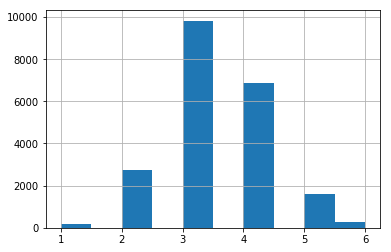

In [30]:
df.bedrooms.hist()

### Question 1:
-- As the number of bedrooms increases does the price increase?<br>
--- Visual: create a scatter plot for the amount of bedrooms and price of each house.<br>
---- Conclusion: as the number of bedrooms increases the price of a house does increase.

C:\Users\denis\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


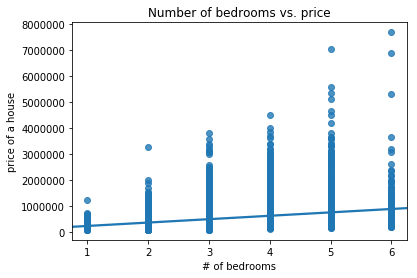

In [31]:
sns.regplot(df['bedrooms'], df['price'])
plt.xlabel('# of bedrooms')
plt.ylabel('price of a house')
plt.title('Number of bedrooms vs. price')
plt.show()

### Question 2:
-- As the number of bathrooms increases does the price increase?<br>
--- Visual: create a scatter plot for the amount of bathrooms and price of each house.<br>
---- Conclusion: as the number of bathrooms increases the price of a house does increase.

C:\Users\denis\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


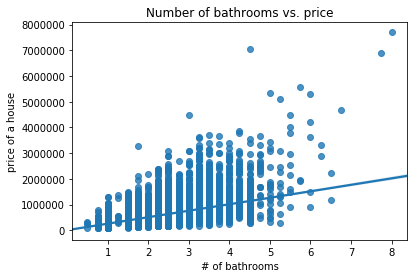

In [32]:
sns.regplot(df['bathrooms'], df['price'])
plt.xlabel('# of bathrooms')
plt.ylabel('price of a house')
plt.title('Number of bathrooms vs. price')
plt.show()

### Question 3:
-- As the square footage of a house increases does the price increase?<br>
--- Visual: create a scatter plot for the square footage of a house and price of each house.<br>
---- Conclusion: as the square footage of a house increases the price of a house does increase.

C:\Users\denis\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


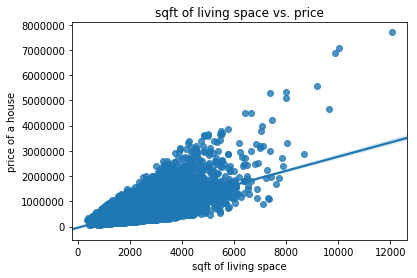

In [33]:
sns.regplot(df['sqft_living'], df['price'])
plt.xlabel('sqft of living space')
plt.ylabel('price of a house')
plt.title('sqft of living space vs. price')
plt.show()

C:\Users\denis\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


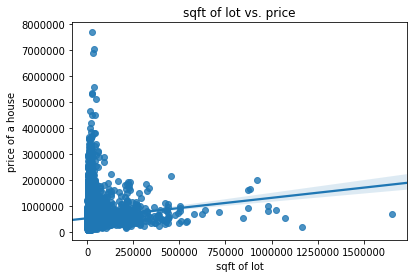

In [34]:
sns.regplot(df['sqft_lot'], df['price'])
plt.xlabel('sqft of lot')
plt.ylabel('price of a house')
plt.title('sqft of lot vs. price')
plt.show()

C:\Users\denis\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


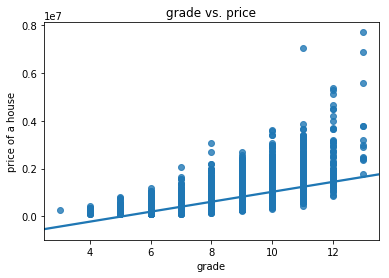

In [35]:
sns.regplot(df['grade'], df['price'])
plt.xlabel('grade')
plt.ylabel('price of a house')
plt.title('grade vs. price')
plt.show()

C:\Users\denis\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


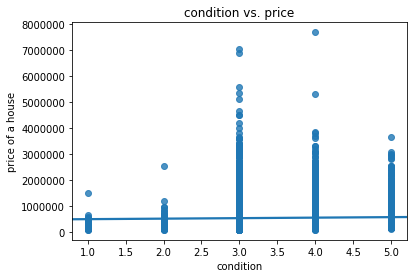

In [36]:
sns.regplot(df['condition'], df['price'])
plt.xlabel('condition')
plt.ylabel('price of a house')
plt.title('condition vs. price')
plt.show()

C:\Users\denis\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


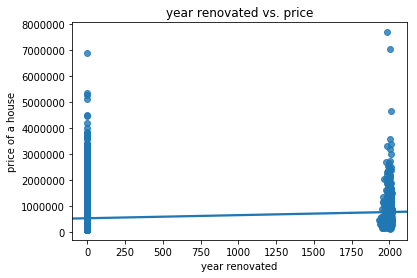

In [37]:
sns.regplot(df['yr_renovated'], df['price'])
plt.xlabel('year renovated')
plt.ylabel('price of a house')
plt.title('year renovated vs. price')
plt.show()

C:\Users\denis\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


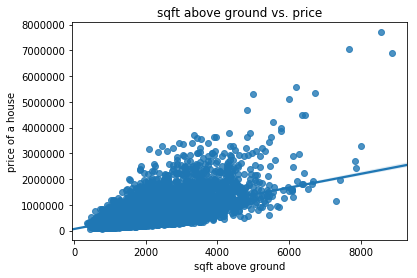

In [38]:
sns.regplot(df['sqft_above'], df['price'])
plt.xlabel('sqft above ground')
plt.ylabel('price of a house')
plt.title('sqft above ground vs. price')
plt.show()

C:\Users\denis\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


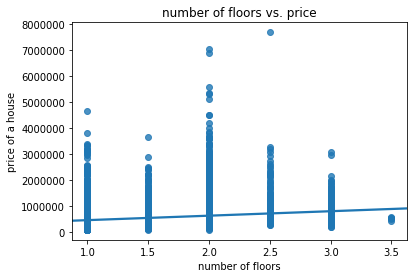

In [39]:
sns.regplot(df['floors'], df['price'])
plt.xlabel('number of floors')
plt.ylabel('price of a house')
plt.title('number of floors vs. price')
plt.show()

In [40]:
df['floors'].value_counts()

1.0    10657
2.0     8203
1.5     1902
3.0      610
2.5      157
3.5        6
Name: floors, dtype: int64

## Creation of a "Month" column:

In [41]:
df['Month'] = df['date'].dt.month
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated_update,Month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,1,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,2


## Creation of a "Day of Week" column:

In [42]:
df['Day_of_Week'] = df['date'].dt.dayofweek
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated_update,Month,Day_of_Week
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0,10,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,12,1
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,1933,NaN,98028,47.7379,-122.233,2720,8062,1,2,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1965,0.0,98136,47.5208,-122.393,1360,5000,0,12,1
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1987,0.0,98074,47.6168,-122.045,1800,7503,0,2,2


In [43]:
df[['date','Day_of_Week']].head()

,date,Day_of_Week
0,2014-10-13,0
1,2014-12-09,1
2,2015-02-25,2
3,2014-12-09,1
4,2015-02-18,2


## Review and conversion of the "waterfront" column.

* Not all values are present.

In [44]:
df['waterfront'].value_counts(dropna=False)

 0.0    19018
NaN      2371
 1.0      146
Name: waterfront, dtype: int64

* There are nulls present.

In [45]:
df['waterfront'].unique()

array([nan,  0.,  1.])

* Are there zip codes that are predominantly waterfront?

In [46]:
df.groupby('zipcode')['waterfront'].value_counts()

zipcode  waterfront
98001    0.0           328
98002    0.0           179
98003    0.0           255
98004    0.0           278
         1.0             1
98005    0.0           158
98006    0.0           432
         1.0             4
98007    0.0           118
98008    0.0           246
         1.0             9
98010    0.0            87
98011    0.0           175
98014    0.0           110
98019    0.0           167
98022    0.0           209
98023    0.0           444
         1.0             3
98024    0.0            73
98027    0.0           368
         1.0             2
98028    0.0           254
         1.0             1
98029    0.0           293
98030    0.0           235
98031    0.0           244
98032    0.0           115
98033    0.0           372
         1.0             3
98034    0.0           478
                      ... 
98117    0.0           492
98118    0.0           442
         1.0             3
98119    0.0           165
98122    0.0           259
98125   

### Summary:
* There appears to be over 2,000 homes in the waterfront column that are nulls.
* Some of these null values in this column reside in zip codes that have waterfront and non-waterfront houses.
* Since unable to determine which are which, there will now be a third category in the waterfront column with a value of '2'.
* This will denote "unknown" if waterfront property.
* Will now convert those nulls to the value of '2' in the waterfront column.

In [47]:
df.waterfront.unique()

array([nan,  0.,  1.])

In [48]:
df['waterfront'].fillna(2, inplace=True)
df['waterfront'].unique()

array([2., 0., 1.])

In [49]:
df.isna().sum()

date                      0
price                     0
bedrooms                  0
bathrooms                 0
sqft_living               0
sqft_lot                  0
floors                    0
waterfront                0
view                     63
condition                 0
grade                     0
sqft_above                0
sqft_basement             0
yr_built                  0
yr_renovated           3828
zipcode                   0
lat                       0
long                      0
sqft_living15             0
sqft_lot15                0
yr_renovated_update       0
Month                     0
Day_of_Week               0
dtype: int64

## Evaluation of nulls in the "view" column.

In [50]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [51]:
df.view.isna().sum()

63

In [52]:
df.view.value_counts(dropna=False)

 0.0    19371
 2.0      952
 3.0      507
 1.0      327
 4.0      315
NaN        63
Name: view, dtype: int64

In [53]:
df.view.value_counts(normalize=True, dropna=False)

 0.0    0.899512
 2.0    0.044207
 3.0    0.023543
 1.0    0.015185
 4.0    0.014627
NaN     0.002925
Name: view, dtype: float64

* It looks like 63 houses out of 21,000 have an unknown amount of views.  Almost 90% of houses have not been viewed.  Decision is that since less than 10% of total houses have been viewed this likely is not a critical factor.  The nulls in this column will be converted into the "zero" view value.

In [54]:
df['view'].fillna(0, inplace=True)
df['view'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: view, dtype: float64

In [55]:
df.view.isna().sum()

0

In [56]:
df.view.value_counts()

0.0    19434
2.0      952
3.0      507
1.0      327
4.0      315
Name: view, dtype: int64

In [57]:
df.view.unique()

array([0., 3., 4., 2., 1.])

## ADDRESSING SQFT_BASEMENT COLUMN:

In [58]:
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [59]:
df.sqft_basement.value_counts().head(20)

0.0       12807
?           452
600.0       214
500.0       209
700.0       208
800.0       200
400.0       184
1000.0      147
900.0       142
300.0       142
200.0       105
480.0       103
530.0       103
450.0       103
750.0       103
720.0        98
620.0        90
580.0        83
840.0        83
420.0        81
Name: sqft_basement, dtype: int64

* There are 452 rows with the '?' value in the sqft_basement column - this is 2.1% of the total.  Additionally, there are over 12,800 rows with a zero value in the sqft_basement column which is 59.39% of the total.  It is appropriate to convert the '?' values to a zero value, as well.  Will do this using a "replace" statement.

In [60]:
df['sqft_basement'].replace('?', 0, inplace=True)
df['sqft_basement'].value_counts().head(20)

0.0       12807
0           452
600.0       214
500.0       209
700.0       208
800.0       200
400.0       184
1000.0      147
900.0       142
300.0       142
200.0       105
480.0       103
530.0       103
750.0       103
450.0       103
720.0        98
620.0        90
580.0        83
840.0        83
420.0        81
Name: sqft_basement, dtype: int64

In [61]:
df.sqft_basement.value_counts().head()

0.0      12807
0          452
600.0      214
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21535 entries, 0 to 21596
Data columns (total 23 columns):
date                   21535 non-null datetime64[ns]
price                  21535 non-null float64
bedrooms               21535 non-null int64
bathrooms              21535 non-null float64
sqft_living            21535 non-null int64
sqft_lot               21535 non-null int64
floors                 21535 non-null float64
waterfront             21535 non-null float64
view                   21535 non-null float64
condition              21535 non-null int64
grade                  21535 non-null int64
sqft_above             21535 non-null int64
sqft_basement          21535 non-null object
yr_built               21535 non-null int64
yr_renovated           17707 non-null float64
zipcode                21535 non-null int64
lat                    21535 non-null float64
long                   21535 non-null float64
sqft_living15          21535 non-null int64
sqft_lot15             21535 

* Also need to conver the the "sqft_basement" data type to float from object since it is a continuous variable.

In [63]:
df['sqft_basement'].dtypes

dtype('O')

In [64]:
df['sqft_basement'] = df['sqft_basement'].astype('float64')

In [65]:
df['sqft_basement'].dtypes

dtype('float64')

In [66]:
df['sqft_basement'].head()

0      0.0
1    400.0
2      0.0
3    910.0
4      0.0
Name: sqft_basement, dtype: float64

## Adressing the nulls in the "yr_renovated" column:

In [67]:
df['yr_renovated'].isna().sum()

3828

In [68]:
df['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [69]:
df['yr_renovated'].value_counts(dropna=False).head()

 0.0       16969
NaN         3828
 2014.0       73
 2007.0       30
 2003.0       30
Name: yr_renovated, dtype: int64

* Safe assumption that since the majority of the "yr_renovated" column is zero (meaning the house has not been
renovated) then replacing the nulls with a zero value makes sense since it will have little impact.

In [70]:
df['yr_renovated'].fillna(0, inplace=True)
df['yr_renovated'].unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [71]:
df['yr_renovated'].value_counts().head()

0.0       20797
2014.0       73
2007.0       30
2003.0       30
2013.0       30
Name: yr_renovated, dtype: int64

## ADDRESS NUMBER OF BATHROOMS - LOOK FOR OUTLIERS:

In [72]:
df['bathrooms'].value_counts()

2.50    5374
1.00    3850
1.75    3047
2.25    2044
2.00    1929
1.50    1443
2.75    1179
3.00     744
3.50     725
3.25     587
3.75     152
4.00     128
4.50      95
4.25      77
0.75      71
4.75      21
5.00      20
5.25      12
5.50       9
1.25       9
6.00       5
0.50       4
5.75       3
6.25       2
6.50       2
8.00       1
7.75       1
6.75       1
Name: bathrooms, dtype: int64

* To remove outliers and not have them sway our model all houses with more than 5 bathrooms will be dropped.

In [73]:
df = df[df['bathrooms']<5]
df.shape

(21479, 23)

In [74]:
df['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 4.25, 3.75, 1.25, 0.5 ])

Are there any categorical columns that we need to deal with?  What about the columns with grades like:<br/>
waterfront, view, condition and grade?<br/>
* Waterfront: has 3 values and appears to be categorical.  Only options/values are 0,1 and 2.<br/>
* View: has 5 possible values for the number of views of the property (0,1,2,3,4).  This should remain numeric.<br/>
* Condition: there are 5 possible values in this column (1,2,3,4,5) and they are clearly categorical - integers<br/>
represent what is the property condition from bad to good.  So, this column should be converted to categorical<br/>
values - use one-hot encoding.<br/>
* Grade: ranges from 3 through 13 (11 values) and this denotes categories, or grades, of the quality of the property so this appears<br/>
to be a categorical option, as well.


In [75]:
df['condition'].unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [76]:
df['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13], dtype=int64)

In [77]:
df['view'].unique()

array([0., 3., 4., 2., 1.])

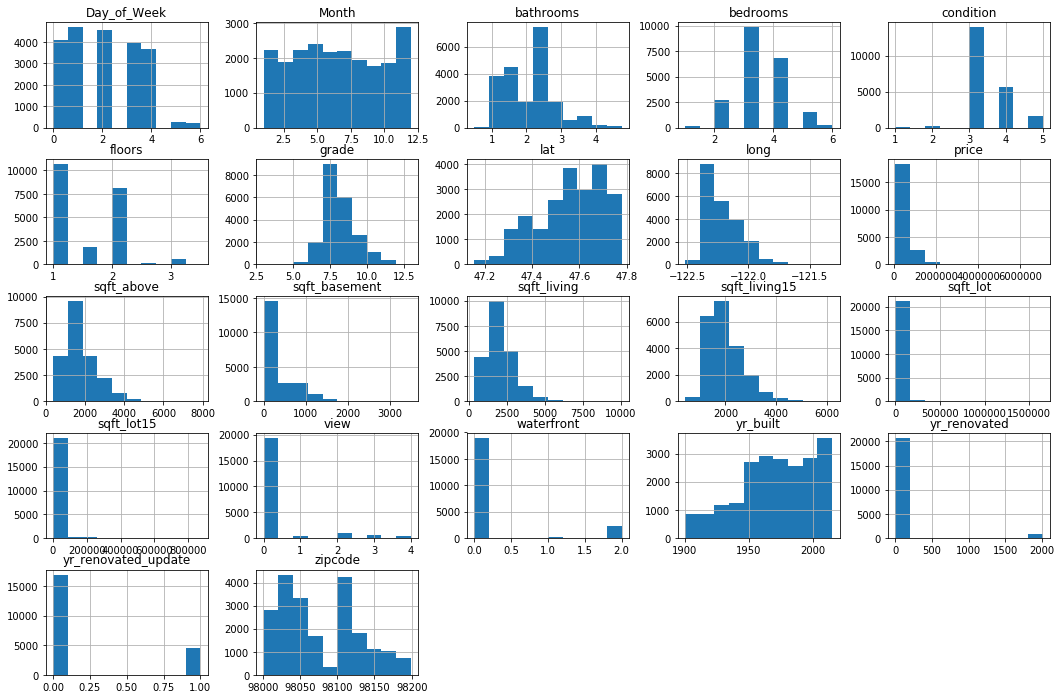

In [78]:
df.hist(figsize=(18,12))
plt.show()

## Addressing Price column and removing outliers:

* Set up histogram to review distribution of prices - there are outliers.

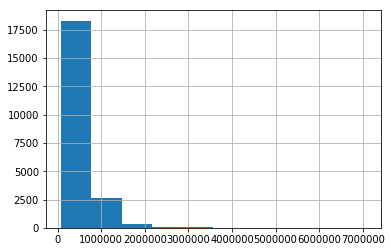

In [79]:
df['price'].hist()

In [80]:
df['price'].value_counts()

350000.0    171
450000.0    169
550000.0    158
500000.0    152
425000.0    150
325000.0    148
400000.0    145
375000.0    138
300000.0    132
525000.0    131
250000.0    130
475000.0    119
330000.0    119
650000.0    116
275000.0    113
315000.0    111
415000.0    111
390000.0    110
440000.0    109
600000.0    109
280000.0    108
320000.0    107
435000.0    105
340000.0    102
310000.0    100
335000.0     98
360000.0     96
420000.0     96
260000.0     95
265000.0     94
           ... 
451555.0      1
575575.0      1
353250.0      1
402395.0      1
271310.0      1
242150.0      1
837500.0      1
608095.0      1
287653.0      1
837700.0      1
176250.0      1
543115.0      1
641250.0      1
475500.0      1
118000.0      1
969000.0      1
386180.0      1
608500.0      1
542950.0      1
968933.0      1
575700.0      1
386100.0      1
641200.0      1
739500.0      1
418900.0      1
234975.0      1
804995.0      1
870515.0      1
336950.0      1
884744.0      1
Name: price, Length: 359

* Sorting values to see the max values in the 'price' column

In [81]:
df.sort_values(['price'], ascending=False).head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated_update,Month,Day_of_Week
3910,2014-06-11,7060000.0,5,4.50,10040,37325,2.0,1.0,2.0,3,...,1940,2001.0,98004,47.6500,-122.214,3930,25449,1,6,2
8629,2014-06-18,4490000.0,4,3.00,6430,27517,2.0,0.0,0.0,3,...,2001,0.0,98004,47.6208,-122.219,3720,14592,0,6,2
2083,2014-11-14,3850000.0,4,4.25,5770,21300,2.0,1.0,4.0,4,...,1980,0.0,98040,47.5850,-122.222,4620,22748,0,11,4
19002,2014-09-11,3800000.0,3,4.25,5510,35000,2.0,0.0,4.0,3,...,1997,0.0,98177,47.7296,-122.370,3430,45302,0,9,3
16288,2014-05-30,3710000.0,4,3.50,5550,28078,2.0,0.0,2.0,4,...,2000,0.0,98039,47.6395,-122.234,2980,19602,0,5,4


* Review the quantiles of the ranges of prices to determine which should remain.

In [82]:
price_list = []
quants = [.85,.86,.87,.88,.89,.90,.91,.92,.93,.94,.95]
for i in quants:
    print(i,'-', df['price'].quantile(i))
    

0.85 - 775000.0
0.86 - 791039.9999999991
0.87 - 810000.0
0.88 - 830000.0
0.89 - 850000.0
0.9 - 878000.0
0.91 - 909489.9999999998
0.92 - 945608.0000000016
0.93 - 985000.0
0.94 - 1050000.0
0.95 - 1140000.0


* The cutoff will be at $985,000.

In [83]:
df = df.loc[df['price']<985000]
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated_update,Month,Day_of_Week
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,2.0,0.0,3,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0,10,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,12,1
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,1933,0.0,98028,47.7379,-122.233,2720,8062,1,2,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1965,0.0,98136,47.5208,-122.393,1360,5000,0,12,1
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1987,0.0,98074,47.6168,-122.045,1800,7503,0,2,2


In [84]:
df.shape

(19971, 23)

## SET UP A HEATMAP TO CHECK FOR MULTICOLLINEARITY:

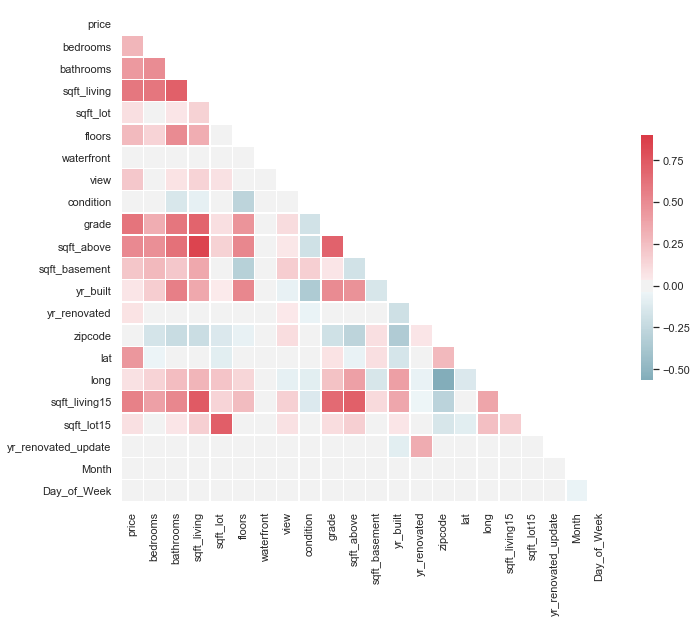

In [85]:
#set up the style of the visualization
sns.set(style='white')

#create a covariance matrix
corr = df.corr()

#generate a mask the size of the covariance matrix
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

#set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

#generate custom heat map
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0, square=True, linewidths=.5, cbar_kws={'shrink':.5})

* HEATMAP: There appears to be some correlations that are significant but nothing above 0.75 so will need to review these or deal with them:<br/>
Highest correlations to Price:<br/>
grade: (0.62)  sqft_living: (0.60)  sqft_living15: (0.55)  sqft_above: (0.51)

In [86]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated_update,Month,Day_of_Week
price,1.000000,0.293643,0.435369,0.600874,0.092820,0.266602,0.004461,0.207967,0.029576,0.613008,...,0.062175,0.072781,-0.019044,0.443764,0.081984,0.546759,0.083803,0.025350,-0.014462,-0.002366
bedrooms,0.293643,1.000000,0.495221,0.604262,0.027407,0.155621,-0.002592,0.033348,0.023000,0.331130,...,0.177670,-0.004669,-0.162693,-0.044192,0.155648,0.392495,0.024524,-0.016854,-0.004984,0.008014
bathrooms,0.435369,0.495221,1.000000,0.706701,0.061551,0.504673,-0.001831,0.076982,-0.140525,0.608086,...,0.560459,0.014015,-0.217172,-0.020397,0.257686,0.524581,0.062850,-0.008047,0.008065,0.010015
sqft_living,0.600874,0.604262,0.706701,1.000000,0.158354,0.334435,0.001076,0.146760,-0.075511,0.692464,...,0.361639,0.013150,-0.213292,-0.003522,0.295376,0.734668,0.173289,-0.006037,0.012519,0.005169
sqft_lot,0.092820,0.027407,0.061551,0.158354,1.000000,-0.019275,0.000992,0.081599,-0.001546,0.089198,...,0.039906,0.009390,-0.130723,-0.095815,0.222582,0.143097,0.717956,-0.007268,0.000806,-0.005851
floors,0.266602,0.155621,0.504673,0.334435,-0.019275,1.000000,-0.002770,-0.018319,-0.280825,0.457489,...,0.518389,-0.007784,-0.067536,0.031798,0.137980,0.265988,-0.022709,-0.011192,0.012525,0.001177
waterfront,0.004461,-0.002592,-0.001831,0.001076,0.000992,-0.002770,1.000000,0.034865,0.003460,-0.003667,...,-0.007911,0.007560,0.015326,0.002246,-0.004121,0.000985,-0.002016,0.009223,-0.005847,0.016570
view,0.207967,0.033348,0.076982,0.146760,0.081599,-0.018319,0.034865,1.000000,0.029390,0.111693,...,-0.069165,0.048037,0.100445,-0.033547,-0.074779,0.166603,0.079431,0.024643,-0.000064,0.011846
condition,0.029576,0.023000,-0.140525,-0.075511,-0.001546,-0.280825,0.003460,0.029390,1.000000,-0.176755,...,-0.349757,-0.053685,-0.006969,-0.020163,-0.096850,-0.124517,0.003708,-0.025969,0.023589,0.009870
grade,0.613008,0.331130,0.608086,0.692464,0.089198,0.457489,-0.003667,0.111693,-0.176755,1.000000,...,0.502829,-0.020881,-0.190275,0.075024,0.235262,0.660334,0.100566,-0.018836,0.013435,0.001753


### * What are the other variables that have high correlations to each other?

### Plotting some kde's:

C:\Users\denis\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


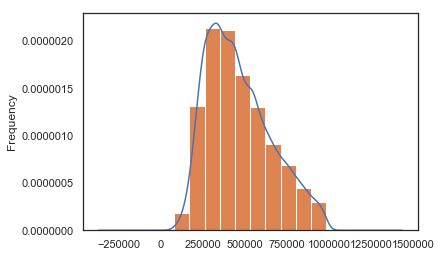

In [87]:
df['price'].plot.kde()
df['price'].plot.hist(normed=True)

C:\Users\denis\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


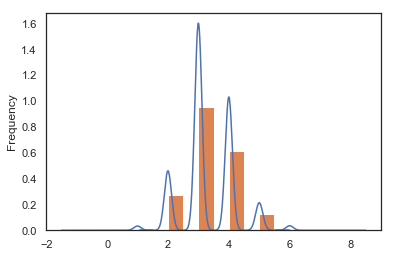

In [88]:
df['bedrooms'].plot.kde()
df['bedrooms'].plot.hist(normed=True)

C:\Users\denis\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


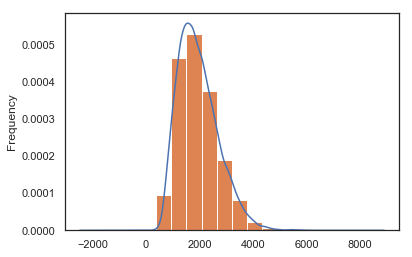

In [89]:
df['sqft_living'].plot.kde()
df['sqft_living'].plot.hist(normed=True)

C:\Users\denis\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


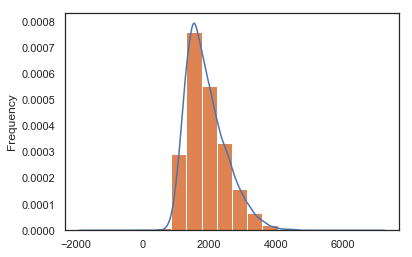

In [90]:
df['sqft_living15'].plot.kde()
df['sqft_living15'].plot.hist(normed=True)

### Plotting some jointplots:

C:\Users\denis\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


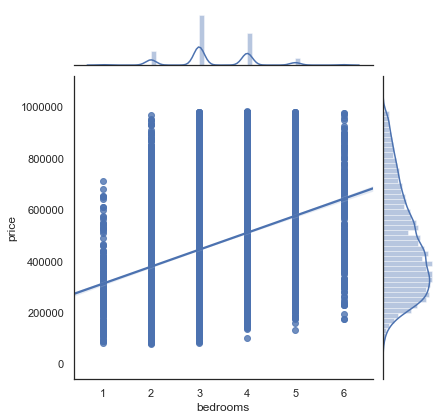

In [91]:
sns.jointplot(x=df['bedrooms'], y=df['price'], data=df, kind='reg')

C:\Users\denis\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


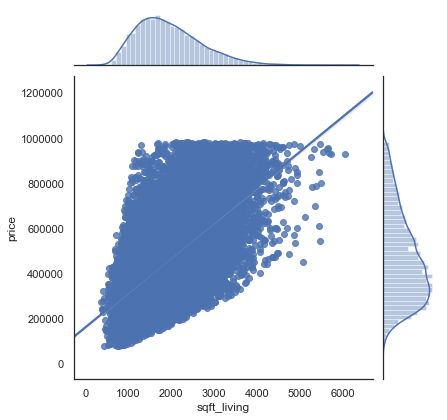

In [92]:
sns.jointplot(x=df['sqft_living'], y=df['price'], data=df, kind='reg')

## Log Transformation:

* Will need to remove the original "yr_renovated" column before log transform.  the "yr_renovated_update" column will remain.

* Testing to find if columns have zero values in them.

In [93]:
df[df['sqft_lot15'] <1]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated_update,Month,Day_of_Week


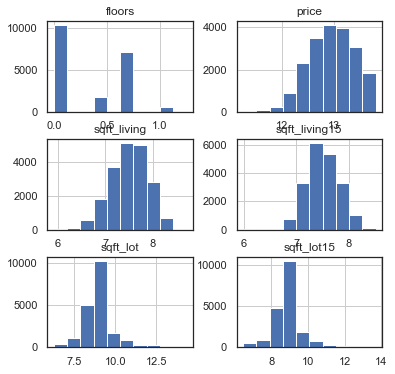

In [95]:
data_log = pd.DataFrame([])

data_log['price'] = np.log(df['price'])
data_log['sqft_living'] = np.log(df['sqft_living'])
data_log['sqft_lot'] = np.log(df['sqft_lot'])
data_log['floors'] = np.log(df['floors'])
data_log['sqft_living15'] = np.log(df['sqft_living15'])
data_log['sqft_lot15'] = np.log(df['sqft_lot15'])

data_log.hist(figsize=[6,6]);

#can't transform anything with zero in it.  .00001 - confirmed the above 6 variables do not contain zeros.

### Need to address each column and whether continuous or category and whether it will dropped or log transformed:<br/>
* 'id' - has been dropped.<br/>
* 'date' - needs to be dropped prior to log transform.  will be kept in original df.<br/>
* 'price' - LT.  needs to be log transformed.  No zeros in price column.  REGRESSION VAR.<br/>
* 'bedrooms' - will leave as is and not log transform.  No zeros in bedrooms column. REGRESSION VAR.<br/>
* 'bathrooms'- will leave as is and not log transform.  No zeros in bathrooms column. REGRESSION VAR.<br/>
* 'sqft_living' - LT.  needs to be log transformed.  No zeros in this column. REGRESSION VAR.<br/>
* 'sqft_lot' - LT.  needs to be log transformed.  No zeros in this column. REGRESSION VAR.<br/>
* 'floors' - LT.  needs to be log transformed. REGRESSION VAR.<br/>
* 'view'- will leave as is and not log transform. REGRESSION VAR.<br/>
* 'sqft_above' - will drop this column for now and leave in original df if need to come back to it.  Don't see it as a solild predictor right now.<br/>
* 'sqft_basement' - this variable has a ton of zeros for houses that don't have basements.  Will dropp this variable.<br/>
* 'yr_built' - Will be dropping this variable from first regression model.<br/>
* 'yr_renovated' - column already converted.  Needs to be dropped prior to log transform.<br/>
* 'zipcode' - Will need to one-hot encode this variable.  REGRESSION VAR. <br/>
* 'lat' - needs to be dropped prior to log transform.  will be kept in original df.<br/>
* 'long' - needs to be dropped prior to log transform.  will be kept in original df.<br/>
* 'sqft_living15' - LT.  needs to be log transformed. REGRESSION VAR.<br/>
* 'sqft_lot15' - LT.  needs to be log transformed. REGRESSION VAR.<br/>
* 'yr_renovated_update' - categorical column.  Leave as is. REGRESSION VAR.<br/>
* 'Month' - needs to be dropped prior to log transform.  will be kept in original df.<br/>
* 'Day_of_Week' - needs to be dropped prior to log transform.  will be kept in original df.<br/>
* 'waterfr_0.0', 'waterfr_1.0', 'waterfr_2.0' - already categorical and one-hot encoded.<br/>
* 'cond_1''cond_2', 'cond_3', 'cond_4','cond_5' - already categorical and one-hot encoded.<br/>
* 'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7','grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12'] - already categorical and one-hot encoded.<br/>

### WORKING ON CONVERTING "WATERFRONT", "CONDITION", "GRADE", "ZIPCODE" COLUMNS TO CATEGORICAL VALUES

In [96]:
#Will need to convert the columns to dummie variables
water_dummies = pd.get_dummies(df['waterfront'], prefix='waterfr')
cond_dummies = pd.get_dummies(df['condition'], prefix='cond')
grade_dummies = pd.get_dummies(df['grade'], prefix='grade')
zip_dummies = pd.get_dummies(df['zipcode'], prefix='zip')

In [97]:
#next will need to remove original columns from data set, rename data set and add new columns
#renaming dataframe from "df" to "data"
data = df.drop(['waterfront', 'condition', 'grade', 'zipcode'], axis=1)

In [98]:
#concatenate dataframe without dropped columns to new dummie columns
data = pd.concat([data, water_dummies, cond_dummies, grade_dummies, zip_dummies], axis=1)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,1180,0.0,...,0,0,0,0,0,0,1,0,0,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,2170,400.0,...,0,0,0,0,0,0,0,0,0,0
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,770,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,1050,910.0,...,0,0,0,0,0,0,0,0,0,0
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,1680,0.0,...,0,0,0,0,0,0,0,0,0,0


* Will now drop columns that won't be in the regression: date, sqft_above, sqft_basement, yr_built, yr_renovated, lat, long, Month, Day_of_Week.
* Will also need to bring in log transformed variables.

In [99]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,1180,0.0,...,0,0,0,0,0,0,1,0,0,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,2170,400.0,...,0,0,0,0,0,0,0,0,0,0
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,770,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,1050,910.0,...,0,0,0,0,0,0,0,0,0,0
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,1680,0.0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
#dropping date, sqft_above, sqft_basement, yr_built, yr_renovated, lat, long, Month, Day_of_Week.
data = data.drop(['date', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'Month', 'Day_of_Week'], axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_living15,sqft_lot15,yr_renovated_update,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,221900.0,3,1.00,1180,5650,1.0,0.0,1340,5650,0,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,1690,7639,1,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0.0,2720,8062,1,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,1360,5000,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,1800,7503,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
#dropping variables that have been log transformed
data = data.drop(['price', 'sqft_living', 'sqft_lot', 'floors', 'sqft_living15', 'sqft_lot15'], axis=1)
data.head()

,bedrooms,bathrooms,view,yr_renovated_update,waterfr_0.0,waterfr_1.0,waterfr_2.0,cond_1,cond_2,cond_3,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,3,1.00,0.0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,3,2.25,0.0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,1.00,0.0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,2.00,0.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [102]:
#concatenate 'data' with log transformed variables in data_log
data = pd.concat([data, data_log], axis=1)
data.head()

,bedrooms,bathrooms,view,yr_renovated_update,waterfr_0.0,waterfr_1.0,waterfr_2.0,cond_1,cond_2,cond_3,...,zip_98178,zip_98188,zip_98198,zip_98199,price,sqft_living,sqft_lot,floors,sqft_living15,sqft_lot15
0,3,1.00,0.0,0,0,0,1,0,0,1,...,1,0,0,0,12.309982,7.073270,8.639411,0.000000,7.200425,8.639411
1,3,2.25,0.0,1,1,0,0,0,0,1,...,0,0,0,0,13.195614,7.851661,8.887653,0.693147,7.432484,8.941022
2,2,1.00,0.0,1,1,0,0,0,0,1,...,0,0,0,0,12.100712,6.646391,9.210340,0.000000,7.908387,8.994917
3,4,3.00,0.0,0,1,0,0,0,0,0,...,0,0,0,0,13.311329,7.580700,8.517193,0.000000,7.215240,8.517193
4,3,2.00,0.0,0,1,0,0,0,0,1,...,0,0,0,0,13.142166,7.426549,8.997147,0.000000,7.495542,8.923058


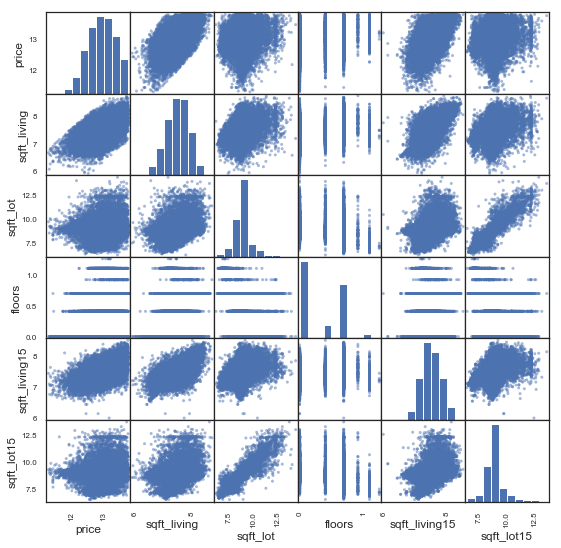

In [103]:
pd.plotting.scatter_matrix(data_log, figsize=(9,9));

In [104]:
data_log.corr()

,price,sqft_living,sqft_lot,floors,sqft_living15,sqft_lot15
price,1.000000,0.586701,0.068359,0.291582,0.530101,0.055948
sqft_living,0.586701,1.000000,0.293559,0.366800,0.717654,0.273192
sqft_lot,0.068359,0.293559,1.000000,-0.248136,0.336436,0.920410
floors,0.291582,0.366800,-0.248136,1.000000,0.280964,-0.236772
sqft_living15,0.530101,0.717654,0.336436,0.280964,1.000000,0.344153
sqft_lot15,0.055948,0.273192,0.920410,-0.236772,0.344153,1.000000


* Correlations of note for price:
* -- sqft_living: .586 
* -- sqft_living15: .530
* Other Correlations:
* -- sqft_living & sqft_living15: .717
* -- sqft_lot & sqft_lot15: .920

In [105]:
abs(data_log.corr()) > 0.75

,price,sqft_living,sqft_lot,floors,sqft_living15,sqft_lot15
price,True,False,False,False,False,False
sqft_living,False,True,False,False,False,False
sqft_lot,False,False,True,False,False,True
floors,False,False,False,True,False,False
sqft_living15,False,False,False,False,True,False
sqft_lot15,False,False,True,False,False,True


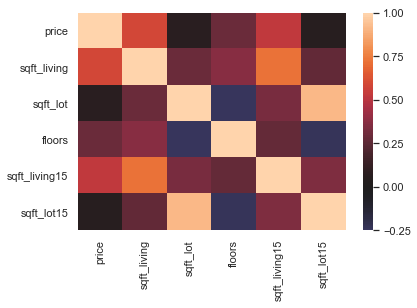

In [106]:
sns.heatmap(data_log.corr(), center=0);

* Deciding to drop the variable "sqft_lot15" due to its high correlation to "sqft_lot".

In [107]:
data = data.drop(['sqft_lot15'], axis=1)
data.head()

,bedrooms,bathrooms,view,yr_renovated_update,waterfr_0.0,waterfr_1.0,waterfr_2.0,cond_1,cond_2,cond_3,...,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,price,sqft_living,sqft_lot,floors,sqft_living15
0,3,1.00,0.0,0,0,0,1,0,0,1,...,0,1,0,0,0,12.309982,7.073270,8.639411,0.000000,7.200425
1,3,2.25,0.0,1,1,0,0,0,0,1,...,0,0,0,0,0,13.195614,7.851661,8.887653,0.693147,7.432484
2,2,1.00,0.0,1,1,0,0,0,0,1,...,0,0,0,0,0,12.100712,6.646391,9.210340,0.000000,7.908387
3,4,3.00,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,13.311329,7.580700,8.517193,0.000000,7.215240
4,3,2.00,0.0,0,1,0,0,0,0,1,...,0,0,0,0,0,13.142166,7.426549,8.997147,0.000000,7.495542


* Running a regression with log transformed price and non-log-transformed bedrooms from the df dataframe.

In [108]:
model_bed = ols(formula = 'price~bedrooms', data = data).fit()
model_bed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     1902.
Date:                Wed, 03 Apr 2019   Prob (F-statistic):               0.00
Time:                        22:21:22   Log-Likelihood:                -10633.
No. Observations:               19971   AIC:                         2.127e+04
Df Residuals:                   19969   BIC:                         2.129e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.4688      0.012   1071.867      0.000      12.446      12.492
bedrooms       0.1485      0.003     43.607      0.000       0.142       0.155
==============================================================================
Omnibus:                      465.855   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              357.498
Skew:                          -0.241   Prob(JB):                     2.35e-78
Kurtosis:                       2.556   Cond. No.                         14.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Running a regression with log transformed price and non-log-transformed bathrooms from the df dataframe.

In [109]:
model_bath = ols(formula = 'price~bathrooms', data = data).fit()
model_bath.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     5016.
Date:                Wed, 03 Apr 2019   Prob (F-statistic):               0.00
Time:                        22:21:22   Log-Likelihood:                -9303.9
No. Observations:               19971   AIC:                         1.861e+04
Df Residuals:                   19969   BIC:                         1.863e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3921      0.008   1463.208      0.000      12.375      12.409
bathrooms      0.2797      0.004     70.822      0.000       0.272       0.287
==============================================================================
Omnibus:                      347.429   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.025
Skew:                          -0.125   Prob(JB):                     2.26e-49
Kurtosis:                       2.545   Cond. No.                         7.98
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Running a regression with log transformed price and log-transformed sqft living from the df dataframe.

In [110]:
model_sq_live = ols(formula = 'price~sqft_living', data = data).fit()
model_sq_live.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                 1.048e+04
Date:                Wed, 03 Apr 2019   Prob (F-statistic):               0.00
Time:                        22:21:22   Log-Likelihood:                -7328.4
No. Observations:               19971   AIC:                         1.466e+04
Df Residuals:                   19969   BIC:                         1.468e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.0973      0.048    170.253      0.000       8.004       8.190
sqft_living     0.6484      0.006    102.380      0.000       0.636       0.661
==============================================================================
Omnibus:                      439.082   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              280.059
Skew:                          -0.156   Prob(JB):                     1.53e-61
Kurtosis:                       2.511   Cond. No.                         147.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Running a regression with log transformed price and non-log-transformed sqft lot from the df dataframe.

In [111]:
model_sq_lot = ols(formula = 'price~sqft_lot', data = data).fit()
model_sq_lot.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     93.75
Date:                Wed, 03 Apr 2019   Prob (F-statistic):           4.00e-22
Time:                        22:21:22   Log-Likelihood:                -11495.
No. Observations:               19971   AIC:                         2.299e+04
Df Residuals:                   19969   BIC:                         2.301e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.6643      0.031    412.798      0.000      12.604      12.724
sqft_lot       0.0330      0.003      9.683      0.000       0.026       0.040
==============================================================================
Omnibus:                      391.051   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              352.671
Skew:                          -0.276   Prob(JB):                     2.62e-77
Kurtosis:                       2.655   Cond. No.                         91.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## <font color=red> MULTIPLE REGRESSION:</font>

In [116]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [114]:
data_log.columns

Index(['price', 'sqft_living', 'sqft_lot', 'floors', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [115]:
data.columns

Index(['bedrooms', 'bathrooms', 'view', 'yr_renovated_update', 'waterfr_0.0',
       'waterfr_1.0', 'waterfr_2.0', 'cond_1', 'cond_2', 'cond_3', 'cond_4',
       'cond_5', 'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7',
       'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'zip_98001',
       'zip_98002', 'zip_98003', 'zip_98004', 'zip_98005', 'zip_98006',
       'zip_98007', 'zip_98008', 'zip_98010', 'zip_98011', 'zip_98014',
       'zip_98019', 'zip_98022', 'zip_98023', 'zip_98024', 'zip_98027',
       'zip_98028', 'zip_98029', 'zip_98030', 'zip_98031', 'zip_98032',
       'zip_98033', 'zip_98034', 'zip_98038', 'zip_98039', 'zip_98040',
       'zip_98042', 'zip_98045', 'zip_98052', 'zip_98053', 'zip_98055',
       'zip_98056', 'zip_98058', 'zip_98059', 'zip_98065', 'zip_98070',
       'zip_98072', 'zip_98074', 'zip_98075', 'zip_98077', 'zip_98092',
       'zip_98102', 'zip_98103', 'zip_98105', 'zip_98106', 'zip_98107',
       'zip_98108', 'zip_98109', 'zip_98112', '

### Multiple regression using log transformed variables.

In [118]:
formula = 'price~bedrooms+bathrooms+floors+sqft_living+sqft_lot'
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     2320.
Date:                Wed, 03 Apr 2019   Prob (F-statistic):               0.00
Time:                        22:30:39   Log-Likelihood:                -6967.2
No. Observations:               19971   AIC:                         1.395e+04
Df Residuals:                   19965   BIC:                         1.399e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.9252      0.065    121.353      0.000       7.797       8.053
bedrooms       -0.0644      0.004    -17.415      0.000      -0.072      -0.057
bathrooms      -0.0005      0.006     -0.097      0.923      -0.012       0.010
floors          0.0490      0.009      5.678      0.000       0.032       0.066
sqft_living     0.7550      0.011     68.632      0.000       0.733       0.777
sqft_lot       -0.0479      0.003    -15.303      0.000      -0.054      -0.042
==============================================================================
Omnibus:                      310.417   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.840
Skew:                          -0.142   Prob(JB):                     1.35e-47
Kurtosis:                       2.577   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Multiple regression using log transformed variables and grade variable.

In [119]:
formula1 = 'price~bedrooms+bathrooms+floors+sqft_living+sqft_lot+grade_3+grade_4+grade_5+grade_6+grade_7+grade_8+grade_9+grade_10+grade_11+grade_12'
model1 = ols(formula=formula1, data=data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     1094.
Date:                Wed, 03 Apr 2019   Prob (F-statistic):               0.00
Time:                        22:34:48   Log-Likelihood:                -5855.5
No. Observations:               19971   AIC:                         1.174e+04
Df Residuals:                   19956   BIC:                         1.186e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.0080      0.079    113.999      0.000       8.853       9.163
bedrooms       -0.0320      0.004     -8.942      0.000      -0.039      -0.025
bathrooms      -0.0367      0.005     -6.793      0.000      -0.047      -0.026
floors         -0.0508      0.008     -5.992      0.000      -0.067      -0.034
sqft_living     0.4998      0.012     42.659      0.000       0.477       0.523
sqft_lot       -0.0504      0.003    -16.683      0.000      -0.056      -0.044
grade_3         0.8793      0.297      2.964      0.003       0.298       1.461
grade_4         0.4658      0.071      6.582      0.000       0.327       0.604
grade_5         0.4854      0.047     10.426      0.000       0.394       0.577
grade_6         0.6037      0.043     13.991      0.000       0.519       0.688
grade_7         0.7624      0.043     17.756      0.000       0.678       0.847
grade_8         0.9411      0.043     21.749      0.000       0.856       1.026
grade_9         1.1191      0.044     25.419      0.000       1.033       1.205
grade_10        1.2354      0.045     27.211      0.000       1.146       1.324
grade_11        1.3078      0.055     23.599      0.000       1.199       1.416
grade_12        1.2080      0.297      4.067      0.000       0.626       1.790
==============================================================================
Omnibus:                       91.347   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.824
Skew:                          -0.101   Prob(JB):                     7.65e-18
Kurtosis:                       2.767   Cond. No.                     1.72e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.04e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Multiple regression using log transformed variables and grade variable and all zip codes.

In [120]:
formula2 = 'price~bedrooms+bathrooms+floors+sqft_living+sqft_lot+grade_3+grade_4+grade_5+grade_6+grade_7+grade_8+grade_9+grade_10+grade_11+grade_12+zip_98001+zip_98002+zip_98003+zip_98004+zip_98005+zip_98006+zip_98007+zip_98008+zip_98010+zip_98011+zip_98014+zip_98019+zip_98022+zip_98023+zip_98024+zip_98027+zip_98028+zip_98029+zip_98030+zip_98031+zip_98032+zip_98033+zip_98034+zip_98038+zip_98039+zip_98040+zip_98042+zip_98045+zip_98052+zip_98053+zip_98055+zip_98056+zip_98058+zip_98059+zip_98065+zip_98070+zip_98072+zip_98074+zip_98075+zip_98077+zip_98092+zip_98102+zip_98103+zip_98105+zip_98106+zip_98107+zip_98108+zip_98109+zip_98112+zip_98115+zip_98116+zip_98117+zip_98118+zip_98119+zip_98122+zip_98125+zip_98126+zip_98133+zip_98136+zip_98144+zip_98146+zip_98148+zip_98155+zip_98166+zip_98168+zip_98177+zip_98178+zip_98188+zip_98198+zip_98199'
model2 = ols(formula=formula2, data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     1095.
Date:                Wed, 03 Apr 2019   Prob (F-statistic):               0.00
Time:                        22:43:08   Log-Likelihood:                 5608.9
No. Observations:               19971   AIC:                        -1.105e+04
Df Residuals:                   19887   BIC:                        -1.039e+04
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.1863      0.045    181.042      0.000       8.098       8.275
bedrooms       -0.0127      0.002     -6.169      0.000      -0.017      -0.009
bathrooms       0.0224      0.003      7.250      0.000       0.016       0.029
floors          0.0033      0.005      0.660      0.509      -0.007       0.013
sqft_living     0.4424      0.007     66.075      0.000       0.429       0.455
sqft_lot        0.0724      0.002     34.652      0.000       0.068       0.077
grade_3         1.1176      0.168      6.664      0.000       0.789       1.446
grade_4         0.5193      0.040     12.961      0.000       0.441       0.598
grade_5         0.5037      0.026     19.080      0.000       0.452       0.555
grade_6         0.5753      0.024     23.516      0.000       0.527       0.623
grade_7         0.6561      0.024     26.970      0.000       0.608       0.704
grade_8         0.7559      0.025     30.839      0.000       0.708       0.804
grade_9         0.8770      0.025     35.160      0.000       0.828       0.926
grade_10        0.9236      0.026     35.818      0.000       0.873       0.974
grade_11        1.0133      0.031     32.239      0.000       0.952       1.075
grade_12        1.2445      0.168      7.416      0.000       0.916       1.573
zip_98001      -0.3735      0.010    -38.335      0.000      -0.393      -0.354
zip_98002      -0.3694      0.013    -28.231      0.000      -0.395      -0.344
zip_98003      -0.3428      0.011    -31.150      0.000      -0.364      -0.321
zip_98004       0.6919      0.016     42.465      0.000       0.660       0.724
zip_98005       0.3833      0.015     25.061      0.000       0.353       0.413
zip_98006       0.2984      0.010     30.880      0.000       0.280       0.317
zip_98007       0.2995      0.016     18.815      0.000       0.268       0.331
zip_98008       0.3079      0.011     27.077      0.000       0.286       0.330
zip_98010      -0.1267      0.018     -6.905      0.000      -0.163      -0.091
zip_98011       0.0882      0.013      6.708      0.000       0.062       0.114
zip_98014      -0.1058      0.017     -6.265      0.000      -0.139      -0.073
zip_98019      -0.0594      0.013     -4.422      0.000      -0.086      -0.033
zip_98022      -0.2843      0.012    -23.323      0.000      -0.308      -0.260
zip_98023      -0.3899      0.008    -46.667      0.000      -0.406      -0.373
zip_98024       0.0097      0.022      0.443      0.658      -0.033       0.053
zip_98027       0.1544      0.009     16.291      0.000       0.136       0.173
zip_98028       0.0544      0.011      4.944      0.000       0.033       0.076
zip_98029       0.2519      0.011     23.729      0.000       0.231       0.273
zip_98030      -0.3175      0.011    -27.621      0.000      -0.340      -0.295
zip_98031      -0.2893      0.011    -25.98

In [ ]:
zip_98001+zip_98002+zip_98003+zip_98004+zip_98005+zip_98006+zip_98007+zip_98008+zip_98010+zip_98011+zip_98014+zip_98019+zip_98022+zip_98023+zip_98024+zip_98027+zip_98028+zip_98029+zip_98030+zip_98031+zip_98032+
zip_98033+zip_98034+zip_98038+zip_98039+zip_98040+zip_98042+zip_98045+zip_98052+zip_98053+zip_98055+zip_98056+zip_98058+zip_98059+zip_98065+zip_98070+zip_98072+zip_98074+zip_98075+zip_98077+zip_98092+
zip_98102+zip_98103+zip_98105+zip_98106+zip_98107+zip_98108+zip_98109+zip_98112+zip_98115+zip_98116+zip_98117+zip_98118+zip_98119+zip_98122+zip_98125+zip_98126+zip_98133+zip_98136+zip_98144+zip_98146+
zip_98148+zip_98155+zip_98166+zip_98168+zip_98177+zip_98178+zip_98188+zip_98198+zip_98199

#### Discover top 10 and bottom 10 zip codes for a better fitting multiple regression model:

In [126]:
df.groupby('zipcode')['price'].mean().sort_values()

zipcode
98002    233398.593909
98168    240328.371747
98032    251296.240000
98001    281194.869806
98023    283007.370221
98148    284908.596491
98188    289078.345588
98003    292513.111111
98030    295467.149020
98198    295795.276978
98031    300340.402930
98178    302232.853846
98055    303286.635338
98042    310714.183150
98022    316742.390558
98106    318680.981982
98092    335077.980000
98146    338273.747331
98058    347917.431416
98108    355678.516129
98038    362725.058020
98133    386595.334694
98118    398888.741935
98155    399695.570776
98056    405594.920200
98166    409056.012552
98045    419679.576744
98126    420520.085470
98019    421665.936508
98010    423665.990000
             ...      
98136    514259.446215
98072    531010.042969
98177    546955.608108
98117    552834.572779
98107    554743.111538
98008    555409.840304
98103    556275.115385
98116    560883.617162
98027    566021.221649
98122    567024.098485
98115    576540.107861
98029    580359.345277
980

In [ ]:
zip_98002+zip_98168+zip98032+zip_98001+zip_98023+zip_98148+zip_98188+zip_98003+zip_98030+zip98198+zip_98102+zip_98109+zip_98006+zip_98119+zip_98112+zip_98075+zip_98005+zip_98004+zip_98040+zip_98039

In [141]:
formula3 = 'price~bedrooms+bathrooms+floors+sqft_living+sqft_lot+grade_3+grade_4+grade_5+grade_6+grade_7+grade_8+grade_9+grade_10+grade_11+grade_12+zip_98002+zip_98168+zip_98032+zip_98001+zip_98023+zip_98148+zip_98188+zip_98003+zip_98030+zip_98198+zip_98102+zip_98109+zip_98006+zip_98119+zip_98112+zip_98075+zip_98005+zip_98004+zip_98040+zip_98039'
model3 = ols(formula=formula3, data=data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     876.4
Date:                Wed, 03 Apr 2019   Prob (F-statistic):               0.00
Time:                        23:59:16   Log-Likelihood:                -2413.2
No. Observations:               19971   AIC:                             4896.
Df Residuals:                   19936   BIC:                             5173.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.9596      0.067    134.346      0.000       8.829       9.090
bedrooms       -0.0246      0.003     -8.142      0.000      -0.030      -0.019
bathrooms      -0.0244      0.005     -5.344      0.000      -0.033      -0.015
floors         -0.0478      0.007     -6.615      0.000      -0.062      -0.034
sqft_living     0.4769      0.010     48.279      0.000       0.458       0.496
sqft_lot       -0.0289      0.003    -11.203      0.000      -0.034      -0.024
grade_3         0.8505      0.250      3.405      0.001       0.361       1.340
grade_4         0.5058      0.060      8.486      0.000       0.389       0.623
grade_5         0.5561      0.039     14.177      0.000       0.479       0.633
grade_6         0.6536      0.036     17.978      0.000       0.582       0.725
grade_7         0.7902      0.036     21.849      0.000       0.719       0.861
grade_8         0.9320      0.036     25.571      0.000       0.861       1.003
grade_9         1.0767      0.037     29.032      0.000       1.004       1.149
grade_10        1.1780      0.038     30.765      0.000       1.103       1.253
grade_11        1.2678      0.047     27.154      0.000       1.176       1.359
grade_12        1.1487      0.250      4.593      0.000       0.658       1.639
zip_98002      -0.4828      0.020    -24.526      0.000      -0.521      -0.444
zip_98168      -0.4046      0.017    -23.791      0.000      -0.438      -0.371
zip_98032      -0.5032      0.025    -20.465      0.000      -0.551      -0.455
zip_98001      -0.4602      0.015    -31.555      0.000      -0.489      -0.432
zip_98023      -0.5047      0.012    -40.415      0.000      -0.529      -0.480
zip_98148      -0.3333      0.036     -9.181      0.000      -0.404      -0.262
zip_98188      -0.3730      0.024    -15.820      0.000      -0.419      -0.327
zip_98003      -0.4571      0.017    -27.634      0.000      -0.490      -0.425
zip_98030      -0.4212      0.017    -24.389      0.000      -0.455      -0.387
zip_98198      -0.3738      0.017    -22.557      0.000      -0.406      -0.341
zip_98102       0.3625      0.031     11.625      0.000       0.301       0.424
zip_98109       0.3947      0.031     12.764      0.000       0.334       0.455
zip_98006       0.1808      0.014     12.504      0.000       0.152       0.209
zip_98119       0.3815      0.023     16.636      0.000       0.337       0.426
zip_98112       0.3823      0.023     16.736      0.000       0.337       0.427
zip_98075       0.1369      0.016      8.523      0.000       0.105       0.168
zip_98005       0.2878      0.023     12.493      0.000       0.243       0.333
zip_98004       0.5661      0.025     23.026      0.000       0.518       0.614
zip_98040       0.4219      0.024     17.711      0.000       0.375       0.469
zip_98039       0.8375      0.122      6.84

### INTERPRETATION OF COEFFICIENTS:

* __Price__:<br>
-- The dependent variable and it has been log transformed.<br>
* __Number of bedrooms__:<br>
-- An independent variable and it has not been log transformed.<br>
--- DV: log  / IV: no transform<br>
--- Impact: a 1 unit increase in the number of bedrooms will result in a decrease in the price of a house by 100 * -0.0237% or 2.37%
* __Number of bathrooms__:<br>
-- An independent variable and it has not been log transformed.<br>
--- DV: log / IV: no transform<br>
--- Impact: a 1 unit increase in the number of bathrooms will result in a decrease in the price of a house by 100 * -0.0326% or 3.26%
* __Sqft_living__:<br>
-- An independent variable and it has been log transformed.<br>
--- DV: log / IV: log<br>
--- Impact: a 1% increase in the sqft_living variable will result in an increase in the price of a house by 0.4745%.

In [130]:
#create new dataframe of components for cross validation - list of variables from the final multiple regression.

data_final_reg = data.drop([ 'view', 'yr_renovated_update', 'waterfr_0.0','waterfr_1.0', 'waterfr_2.0', 'cond_1', 'cond_2', 'cond_3', 'cond_4','cond_5', 'zip_98007', 'zip_98008', 'zip_98010', 'zip_98011', 'zip_98014','zip_98019', 'zip_98022', 'zip_98024', 'zip_98027','zip_98028', 'zip_98029', 'zip_98031', 'zip_98033', 'zip_98034', 'zip_98038', 'zip_98042', 'zip_98045', 'zip_98052', 'zip_98053', 'zip_98055','zip_98056', 'zip_98058', 'zip_98059', 'zip_98065', 'zip_98070','zip_98072', 'zip_98074', 'zip_98077', 'zip_98092','zip_98103', 'zip_98105', 'zip_98106', 'zip_98107','zip_98108', 'zip_98115', 'zip_98116','zip_98117', 'zip_98118', 'zip_98122', 'zip_98125','zip_98126', 'zip_98133', 'zip_98136', 'zip_98144', 'zip_98146','zip_98155', 'zip_98166', 'zip_98177','zip_98178', 'zip_98199', 'price','sqft_living15'], axis=1)
data.head()

,bedrooms,bathrooms,view,yr_renovated_update,waterfr_0.0,waterfr_1.0,waterfr_2.0,cond_1,cond_2,cond_3,...,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,price,sqft_living,sqft_lot,floors,sqft_living15
0,3,1.00,0.0,0,0,0,1,0,0,1,...,0,1,0,0,0,12.309982,7.073270,8.639411,0.000000,7.200425
1,3,2.25,0.0,1,1,0,0,0,0,1,...,0,0,0,0,0,13.195614,7.851661,8.887653,0.693147,7.432484
2,2,1.00,0.0,1,1,0,0,0,0,1,...,0,0,0,0,0,12.100712,6.646391,9.210340,0.000000,7.908387
3,4,3.00,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,13.311329,7.580700,8.517193,0.000000,7.215240
4,3,2.00,0.0,0,1,0,0,0,0,1,...,0,0,0,0,0,13.142166,7.426549,8.997147,0.000000,7.495542


In [131]:
data_final_reg.columns

Index(['bedrooms', 'bathrooms', 'grade_3', 'grade_4', 'grade_5', 'grade_6',
       'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12',
       'zip_98001', 'zip_98002', 'zip_98003', 'zip_98004', 'zip_98005',
       'zip_98006', 'zip_98023', 'zip_98030', 'zip_98032', 'zip_98039',
       'zip_98040', 'zip_98075', 'zip_98102', 'zip_98109', 'zip_98112',
       'zip_98119', 'zip_98148', 'zip_98168', 'zip_98188', 'zip_98198',
       'sqft_living', 'sqft_lot', 'floors'],
      dtype='object')

### Linear Regression in Statsmodels:

In [133]:
from sklearn.linear_model import LinearRegression

In [137]:
linreg=LinearRegression()
linreg.fit(data_final_reg, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [138]:
linreg.coef_

array([-8.79311711e+03, -1.30053693e+04,  9.67399618e+16,  9.67399618e+16,
        9.67399618e+16,  9.67399618e+16,  9.67399618e+16,  9.67399618e+16,
        9.67399618e+16,  9.67399618e+16,  9.67399618e+16,  9.67399618e+16,
       -1.72359638e+05, -1.64546832e+05, -1.76553512e+05,  3.15780270e+05,
        1.63333078e+05,  1.00678259e+05, -1.97862961e+05, -1.72125951e+05,
       -1.79734661e+05,  4.77616318e+05,  2.49521326e+05,  7.42708466e+04,
        1.85321309e+05,  2.02705134e+05,  2.03166258e+05,  1.96745574e+05,
       -1.20203691e+05, -1.33432924e+05, -1.38771754e+05, -1.32870359e+05,
        2.08084501e+05, -1.29032010e+04, -2.56703067e+04])

In [139]:
linreg.intercept_

-9.673996178738472e+16

## CROSS VALIDATION:

In [143]:
from  sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = np.mean(cross_val_score(linreg, data_final_reg, data['price'], cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(linreg, data_final_reg, data['price'], cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(linreg, data_final_reg, data['price'], cv=20, scoring="neg_mean_squared_error"))

print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

-7.48994265272718e+17
-2.7658954434486856e+18
-6.459486527399575e+18


# SUMMARY OF REGRESSION MODEL:
The final regression model chosen consists of including the following variables:
* Price(log transformed)
* Number of bedrooms (not log transformed).
* Number of bathrooms (not log transformed).
* Square feet of living space
* Square feet of lot space
* Grade of the house – inclusive from 3 through 12
* Zip codes – top 10 and bottom 10 average house price zip codes.<br><br>
This final model represented a nice balance of what some people would think of as “traditional” house valuation components (beds, baths) and then more “updated” components that would be difficult for someone to do either by hand or manually (top/bottom 10 zip code mean house prices).  The progression through this exercise was time consuming but interesting as it moved from a single variable regression model (# of bedrooms~price, # of bathrooms~price) which had minimal correlations (R^2 of 0.087, 0.201 respectively) to multiple regression models that were overfitting (model that included all zip codes with R^2 of 0.820) and had a large number of variables (84 independent variables).  The final model produced a respectable R^2 of .598 and had a relatively understandable variable set (24 independent variables).  In summary, this presented the best alternative of the models tested and is the one I am recommending.
